# Imports

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

Epoch 1/50
3/3 - 1s - loss: 0.1231 - val_loss: 0.0898 - 1s/epoch - 475ms/step
Epoch 2/50
3/3 - 0s - loss: 0.0871 - val_loss: 0.0767 - 40ms/epoch - 13ms/step
Epoch 3/50
3/3 - 0s - loss: 0.0749 - val_loss: 0.0702 - 42ms/epoch - 14ms/step
Epoch 4/50
3/3 - 0s - loss: 0.0680 - val_loss: 0.0657 - 42ms/epoch - 14ms/step
Epoch 5/50
3/3 - 0s - loss: 0.0623 - val_loss: 0.0610 - 42ms/epoch - 14ms/step
Epoch 6/50
3/3 - 0s - loss: 0.0570 - val_loss: 0.0565 - 41ms/epoch - 14ms/step
Epoch 7/50
3/3 - 0s - loss: 0.0528 - val_loss: 0.0519 - 41ms/epoch - 14ms/step
Epoch 8/50
3/3 - 0s - loss: 0.0482 - val_loss: 0.0477 - 42ms/epoch - 14ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0444 - val_loss: 0.0449 - 41ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0416 - val_loss: 0.0421 - 54ms/epoch - 18ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0388 - val_loss: 0.0400 - 45ms/epoch - 15ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0367 - val_loss: 0.0386 - 44ms/epoch - 15ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0351 - val_loss: 0.

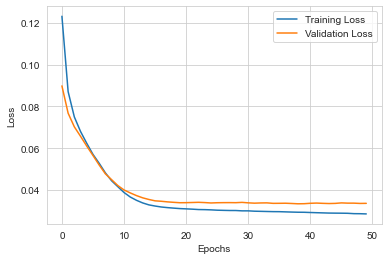

1/1 [==============================] - 0s 223ms/step


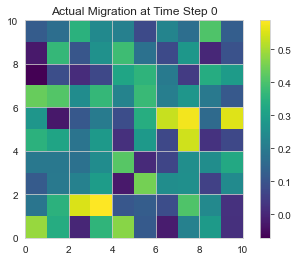

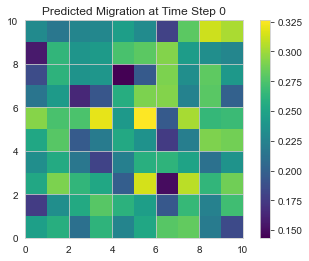

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions and migrations are 2D arrays (grid) of the same shape
emissions = np.random.rand(100, 10, 10)  # Assuming a 10x10 grid
migrations = 0.5 * emissions + 0.1 * np.random.randn(100, 10, 10)

# Flatten the grid into sequences for training the RNN
sequence_length = 10  # You can adjust this based on the length of sequences you want
X, y = [], []

for i in range(len(emissions) - sequence_length):
    X.append(emissions[i:i+sequence_length].flatten())
    y.append(migrations[i+sequence_length].flatten())

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the flattened sequences back into the grid shape
X_train = X_train.reshape(-1, sequence_length, 100)  # Assuming a 10x10 grid
X_test = X_test.reshape(-1, sequence_length, 100)

# Build the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(sequence_length, 100)),
    tf.keras.layers.Dense(units=100)  # Assuming a 10x10 grid
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Squared Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Reshape the predicted sequences back into the grid shape
predictions = predictions.reshape(-1, 10, 10)  # Assuming a 10x10 grid

# Plot a specific slice of the grid for visualization
plt.imshow(migrations[0], cmap='viridis', origin='lower', extent=[0, 10, 0, 10])
plt.title('Actual Migration at Time Step 0')
plt.colorbar()
plt.show()

plt.imshow(predictions[0], cmap='viridis', origin='lower', extent=[0, 10, 0, 10])
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()


# Simple translation to our case

## Reading datasets

### Palm output

In [2]:
import netCDF4 as nc
output_emissions_no2_0 = nc.Dataset("../data/photoshade_6km10m_lod2_av_masked_M01.000.nc")
output_emissions_no2_1 = nc.Dataset("../data/photoshade_6km10m_lod2_av_masked_M01.001.nc")
output_emissions_no2_2 = nc.Dataset("../data/photoshade_6km10m_lod2_av_masked_M01.002.nc")
output_emissions_no2_3 = nc.Dataset("../data/photoshade_6km10m_lod2_av_masked_M01.003.nc")
output_emissions_no2_4 = nc.Dataset("../data/photoshade_6km10m_lod2_av_masked_M01.004.nc")

output_emissions_no2_list = [output_emissions_no2_0,
                             output_emissions_no2_1,
                             output_emissions_no2_2,
                             output_emissions_no2_3,
                             output_emissions_no2_4,]

In [3]:
migrations = []
xrange = [i for i in range(0,672,1)] # Subsetting specific grid part
yrange = [i for i in range(0,672,1)] # Subsetting specific grid part
pollutant = "kc_NO2"
for output_table in output_emissions_no2_list:
    timebins = (output_table["time"][:].data/3600).astype(int) # getting hours array (after conversion from seconds to hours)
    for i in range(len(timebins)):
        temp = output_table[pollutant][i,0,yrange,xrange].data#(netcdf format [hour,y,x])
        print(temp)
        migrations.append(temp)

[[ 1.01497509e-02  1.01466635e-02  1.01436023e-02 ...  1.01645896e-02
   1.01506347e-02  1.01479013e-02]
 [-9.99900000e+03  1.01435138e-02  1.01412162e-02 ...  1.01605533e-02
   1.01453867e-02  1.01415450e-02]
 [-9.99900000e+03 -9.99900000e+03  1.01285819e-02 ...  1.01507641e-02
   1.01363352e-02  1.01333056e-02]
 ...
 [ 1.01782894e-02  1.01692211e-02  1.01732612e-02 ...  1.01743583e-02
   1.01781739e-02  1.01791173e-02]
 [ 1.01683699e-02  1.01540107e-02  1.01614557e-02 ...  1.01666236e-02
   1.01637840e-02  1.01728830e-02]
 [ 1.01574846e-02  1.01480503e-02 -9.99900000e+03 ...  1.01642087e-02
   1.01578943e-02 -9.99900000e+03]]
[[ 8.9571243e-03  8.9454362e-03  8.9312633e-03 ...  8.9687314e-03
   8.9635216e-03  8.9709479e-03]
 [-9.9990000e+03  8.9336773e-03  8.9274831e-03 ...  8.9769932e-03
   8.9713661e-03  8.9791268e-03]
 [-9.9990000e+03 -9.9990000e+03  8.9226803e-03 ...  8.9857616e-03
   8.9815101e-03  8.9891041e-03]
 ...
 [ 8.9444555e-03  8.9341244e-03  8.9306990e-03 ...  8.9607332e

In [4]:
ext = 300

In [5]:
migrations = np.array(migrations)
migrations = migrations[:,:ext,:ext]
migrations[migrations == -9999] = 0
migrations.shape

(48, 300, 300)

### Chemistry driver

In [6]:
ds = nc.Dataset("../data/photoshade_6km10m_lod2_chemistry.nc")
emissions = []
xrange = [i for i in range(0,672,1)] # Subsetting specific grid part
yrange = [i for i in range(0,672,1)] # Subsetting specific grid part
for i in range(48):
    temp = (ds["emission_values"][i,0,yrange,xrange,0].data) #[hour,z,y,x,species]
    emissions.append(temp)


In [7]:
emissions = np.array(emissions)
emissions = emissions[:,:ext,:ext]
emissions[emissions==-9999] = 0
emissions.shape

(48, 300, 300)

 ### Static driver

In [8]:
ds_static = nc.Dataset("../data/photoshade_6km10m_lod2_static.nc")
buildings = pd.DataFrame(ds_static["buildings_2d"][:ext,:ext].data)
buildings.replace(-9999,0,inplace=True) # because strange values where there are no pollutants
buildings = np.array(buildings)
buildings

array([[ 0.       ,  0.       ,  0.       , ..., 25.096708 , 22.955498 ,
        22.9502   ],
       [ 7.4942026,  2.5527954,  2.5908296, ..., 24.986814 , 23.555376 ,
        23.76222  ],
       [ 9.762539 ,  6.529647 ,  2.6172369, ..., 23.56183  , 23.166653 ,
        24.199463 ],
       ...,
       [ 3.5095394,  3.2244453,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 3.9999337,  3.2244453,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 2.9300003, 10.582035 ,  9.432054 , ...,  0.       ,  0.       ,
         0.       ]], dtype=float32)

In [90]:
wind = np.ndarray(shape=(ext,ext))
wind+= 2.457334
wind

array([[2.457334  , 2.457334  , 3.43132672, ..., 3.20314001, 3.30413503,
        2.76982024],
       [2.74490012, 3.28325373, 2.47262016, ..., 2.72264035, 2.57539988,
        3.28593281],
       [3.26947183, 3.31515132, 3.20098295, ..., 3.37483002, 3.0255665 ,
        3.25233609],
       ...,
       [2.89278966, 3.12242003, 3.01803434, ..., 2.77926716, 2.48888552,
        3.16130875],
       [3.20237404, 3.25376834, 2.58560224, ..., 3.16734869, 2.63341398,
        2.5181132 ],
       [2.48266592, 3.36782199, 3.28641471, ..., 2.67028963, 2.92341302,
        2.83535234]])

### Spatial training representation

In [10]:
migrations.shape

(48, 672, 672)

In [11]:
spat_migrations_train = migrations[:,0:300,0:300]
spat_migrations_test = migrations[:,300:600,300:600]

In [12]:
spat_emissions_train = emissions[:,0:300,0:300]
spat_emissions_test = emissions[:,300:600,300:600]

In [13]:
spat_migrations_test.shape

(48, 300, 300)

## Model without exogenous values non spatial

In [54]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions and migrations are 2D arrays (grid) of the same shape

# Flatten the grid into sequences for training the LSTM
sequence_length = 4  # You can adjust this based on the length of sequences you want
X, y = [], []

for i in range(len(emissions) - sequence_length):
    X.append(emissions[i:i+sequence_length].flatten())
    y.append(migrations[i+sequence_length].flatten())

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the flattened sequences back into the grid shape
X_train = X_train.reshape(-1, sequence_length, ext*ext)  # Assuming a 10x10 grid
X_test = X_test.reshape(-1, sequence_length, ext*ext)

# Build the LSTM model with Mean Absolute Error as the loss function
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 64, activation='relu', input_shape=(sequence_length, ext*ext)),
    tf.keras.layers.Dense(units=ext*ext)  # Assuming a 10x10 grid
])

# Compile the model with Mean Absolute Error as the loss function
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)




Epoch 1/15


KeyboardInterrupt: 

In [56]:
X_train.shape

(35, 4, 90000)

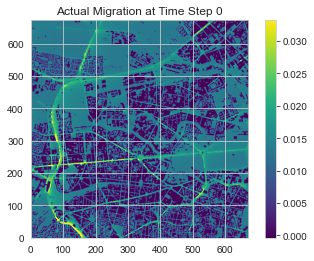

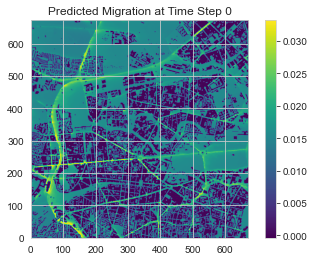

In [115]:
# Reshape the predicted sequences back into the grid shape
predictions = predictions.reshape(-1, ext, ext)  # Assuming a 10x10 grid
_min, _max = np.amin(predictions), np.amax(predictions)
# Plot a specific slice of the grid for visualization
plt.imshow(migrations[35], cmap='viridis', origin='lower', extent=[0, ext, 0, ext], vmin = _min, vmax = _max)
plt.title('Actual Migration at Time Step 0')
plt.colorbar()
plt.show()

plt.imshow(predictions[0], cmap='viridis', origin='lower', extent=[0, ext, 0, ext], vmin = _min, vmax = _max)
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()

## Model without exogenous values spatial

In [14]:
X_test.shape

NameError: name 'X_test' is not defined

Epoch 1/50
2/2 - 2s - loss: 0.0101 - val_loss: 0.0096 - 2s/epoch - 1s/step
Epoch 2/50
2/2 - 1s - loss: 0.0094 - val_loss: 0.0094 - 984ms/epoch - 492ms/step
Epoch 3/50
2/2 - 1s - loss: 0.0083 - val_loss: 0.0094 - 986ms/epoch - 493ms/step
Epoch 4/50
2/2 - 1s - loss: 0.0074 - val_loss: 0.0093 - 1s/epoch - 509ms/step
Epoch 5/50
2/2 - 1s - loss: 0.0065 - val_loss: 0.0093 - 1s/epoch - 512ms/step
Epoch 6/50
2/2 - 1s - loss: 0.0056 - val_loss: 0.0093 - 1s/epoch - 515ms/step
Epoch 7/50
2/2 - 1s - loss: 0.0048 - val_loss: 0.0096 - 1s/epoch - 507ms/step
Epoch 8/50
2/2 - 1s - loss: 0.0044 - val_loss: 0.0099 - 1000ms/epoch - 500ms/step
Epoch 9/50
2/2 - 1s - loss: 0.0040 - val_loss: 0.0102 - 993ms/epoch - 497ms/step
Epoch 10/50
2/2 - 1s - loss: 0.0037 - val_loss: 0.0106 - 991ms/epoch - 495ms/step
Epoch 11/50
2/2 - 1s - loss: 0.0036 - val_loss: 0.0109 - 1s/epoch - 512ms/step
Epoch 12/50
2/2 - 1s - loss: 0.0036 - val_loss: 0.0110 - 1s/epoch - 506ms/step
Epoch 13/50
2/2 - 1s - loss: 0.0034 - val_loss: 

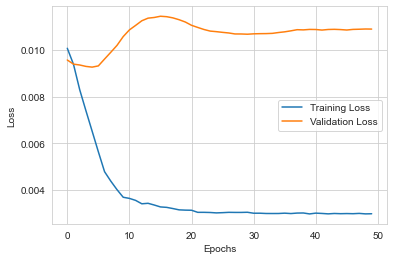

2/2 [==============================] - 0s 35ms/step


In [111]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions and migrations are 2D arrays (grid) of the same shape

# Flatten the grid into sequences for training the LSTM
sequence_length = 4  # You can adjust this based on the length of sequences you want
X_train, y_train = [], []
X_test, y_test = [], []
for i in range(len(emissions) - sequence_length):
    X_train.append(spat_emissions_train[i:i+sequence_length].flatten())
    y_train.append(spat_migrations_train[i+sequence_length].flatten())
    X_test.append(spat_emissions_test[i:i+sequence_length].flatten())
    y_test.append(spat_migrations_test[i+sequence_length].flatten())

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



# Reshape the flattened sequences back into the grid shape
X_train = X_train.reshape(-1, sequence_length, 300*300)  # Assuming a 10x10 grid
X_test = X_test.reshape(-1, sequence_length, 300*300)

# Build the LSTM model with Mean Absolute Error as the loss function
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 64, activation='relu', input_shape=(sequence_length, 300*300)),
    tf.keras.layers.Dense(units=300*300)  # Assuming a 10x10 grid
])

# Compile the model with Mean Absolute Error as the loss function
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)




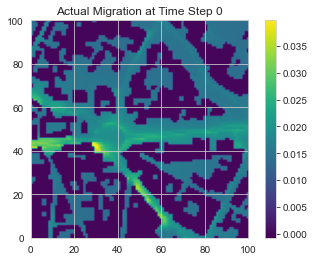

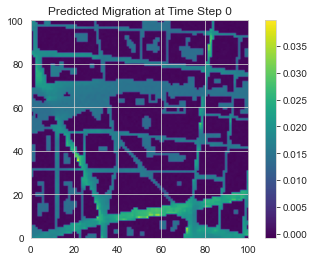

In [69]:
# Reshape the predicted sequences back into the grid shape
predictions = predictions.reshape(-1, 100, 100)  # Assuming a 10x10 grid
_min, _max = np.amin(predictions), np.amax(predictions)
# Plot a specific slice of the grid for visualization
plt.imshow(migrations[35,200:300,300:400], cmap='viridis', origin='lower', extent=[0, 100, 0, 100], vmin = _min, vmax = _max)
plt.title('Actual Migration at Time Step 0')
plt.colorbar()
plt.show()

plt.imshow(predictions[0], cmap='viridis', origin='lower', extent=[0, 100, 0, 100], vmin = _min, vmax = _max)
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()

## Model with exogenous values non spatial

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions and migrations are 2D arrays (grid) of the same shape

# Flatten the grid into sequences for training the RNN
sequence_length = 4  # You can adjust this based on the length of sequences you want
X, y = [], []

for i in range(len(emissions) - sequence_length):
    X.append(emissions[i:i+sequence_length].flatten())
    y.append(migrations[i+sequence_length].flatten())


X = np.array(X)
y = np.array(y)

In [10]:
buildings_full = np.tile(buildings.flatten(), (len(X),1))


# Combine emissions and exogenous variables into a single input array
X_combined = np.concatenate([X, buildings_full], axis=1)

In [11]:
buildings_full.shape+X.shape

(44, 90000, 44, 360000)

In [12]:
X_combined.shape

(44, 450000)

In [13]:
X.shape[1] + buildings.shape[1]

360300

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(35, 450000)

In [ ]:




# Reshape the flattened sequences back into the grid shape
X_train = X_train.reshape( X_train.shape[0],-1, sequence_length)
X_test = X_test.reshape( X_test.shape[0],-1, sequence_length)


# Build the model with Conv1D layer
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, X.shape[1] + buildings_full.shape[1] )),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=ext*ext, activation='relu'),  # Assuming a 10x10 grid
    tf.keras.layers.Dense(units=ext*ext)  # Assuming a 10x10 grid
])





    

In [ ]:
# Compile the model with Mean Absolute Error as the loss function
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

In [76]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate some example data (replace this with your actual data loading)
# Assume emissions, migrations, wind_direction, and temperature are 2D arrays (grid) of the same shape
emissions = np.random.rand(100, 10, 10)  # Assuming a 10x10 grid
migrations = 0.5 * emissions + 0.1 * np.random.randn(100, 10, 10)
wind_direction = np.random.rand(10, 10)  # Example constant exogenous variable for the whole grid
temperature = np.random.rand(10, 10)  # Example constant exogenous variable for the whole grid

# Flatten the grid into sequences for training the Conv1D model
sequence_length = 10  # You can adjust this based on the length of sequences you want
X, y = [], []

for i in range(len(emissions) - sequence_length):
    X.append(emissions[i:i+sequence_length].flatten())
    y.append(migrations[i+sequence_length].flatten())

X = np.array(X)
y = np.array(y)

# Repeat the constant exogenous variables to match the length of X
wind_direction = np.tile(wind_direction.flatten(), (len(X), 1))
temperature = np.tile(temperature.flatten(), (len(X), 1))

# Combine emissions and exogenous variables into a single input array
X_combined = np.concatenate([X, wind_direction, temperature], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Print shapes and sizes for debugging
print("Shapes and Sizes:")
print("X_train shape:", X_train.shape)
print("Expected shape after reshape:", (sequence_length, X_combined.shape[1]))
print("Total number of elements in X_train:", np.prod(X_train.shape))

# Reshape the flattened sequences back into the grid shape
X_train = X_train.reshape(X_train.shape[0], sequence_length, -1)

# Print shapes and sizes after reshape
print("X_train shape after reshape:", X_train.shape)

# ... (remaining code)



Shapes and Sizes:
X_train shape: (72, 1200)
Expected shape after reshape: (10, 1200)
Total number of elements in X_train: 86400
X_train shape after reshape: (72, 10, 120)


In [30]:
X_combined.shape,X.shape,X_train.shape, buildings.shape

((44, 2257920), (44, 1806336), (35, 2257920), (44, 451584))

In [22]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 4, 10000)]           0         []                            
                                                                                                  
 lstm_4 (LSTM)               (None, 50)                   2010200   ['input_9[0][0]']             
                                                                                                  
 input_10 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 concatenate_4 (Concatenate  (None, 150)                  0         ['lstm_4[0][0]',              
 )                                                                   'input_10[0][0]']      

Epoch 1/50
2/2 - 4s - loss: 0.6729 - val_loss: 1.2734 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 2s - loss: 1.1623 - val_loss: 0.2856 - 2s/epoch - 1s/step
Epoch 3/50
2/2 - 2s - loss: 0.2354 - val_loss: 0.1413 - 2s/epoch - 1s/step
Epoch 4/50
2/2 - 2s - loss: 0.1096 - val_loss: 0.0715 - 2s/epoch - 1s/step
Epoch 5/50
2/2 - 2s - loss: 0.0509 - val_loss: 0.0383 - 2s/epoch - 1s/step
Epoch 6/50
2/2 - 2s - loss: 0.0260 - val_loss: 0.0242 - 2s/epoch - 1s/step
Epoch 7/50
2/2 - 2s - loss: 0.0169 - val_loss: 0.0181 - 2s/epoch - 1s/step
Epoch 8/50
2/2 - 2s - loss: 0.0124 - val_loss: 0.0149 - 2s/epoch - 1s/step
Epoch 9/50
2/2 - 2s - loss: 0.0105 - val_loss: 0.0130 - 2s/epoch - 1s/step
Epoch 10/50
2/2 - 2s - loss: 0.0088 - val_loss: 0.0119 - 2s/epoch - 1s/step
Epoch 11/50
2/2 - 2s - loss: 0.0075 - val_loss: 0.0111 - 2s/epoch - 1s/step
Epoch 12/50
2/2 - 2s - loss: 0.0065 - val_loss: 0.0107 - 2s/epoch - 1s/step
Epoch 13/50
2/2 - 2s - loss: 0.0057 - val_loss: 0.0103 - 2s/epoch - 1s/step
Epoch 14/50
2/2 - 2s 

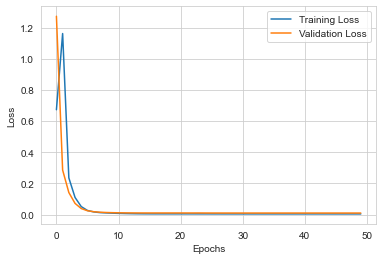

1/1 [==============================] - 0s 177ms/step


In [25]:
# Train the model
history = model.fit(
    [X_train, exogenous_train], y_train, epochs=50, batch_size=32, validation_data=([X_test, exogenous_test], y_test), verbose=2
)

# Evaluate the model
loss = model.evaluate([X_test, exogenous_test], y_test, verbose=0)
print(f'Mean Absolute Error on Test Set: {loss}')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict([X_test, exogenous_test])


In [26]:
predictions

array([[0.0145017 , 0.00701229, 0.02417586, ..., 0.01996027, 0.0228164 ,
        0.01444465],
       [0.01371716, 0.01625823, 0.01310328, ..., 0.01653408, 0.01744281,
        0.01685644],
       [0.01139753, 0.00867976, 0.01195446, ..., 0.01224705, 0.02273024,
        0.0245593 ],
       ...,
       [0.02509495, 0.02423398, 0.00731917, ..., 0.00945791, 0.02984335,
        0.02341242],
       [0.01337544, 0.01525606, 0.02560547, ..., 0.00902352, 0.02297853,
        0.00890639],
       [0.01948714, 0.02986768, 0.01596504, ..., 0.00225685, 0.02265641,
        0.01495003]], dtype=float32)

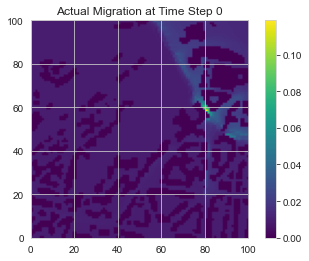

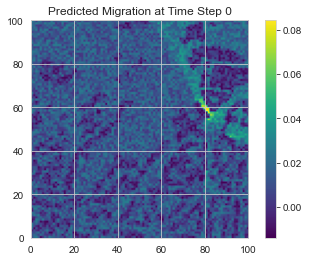

In [27]:
# Reshape the predicted sequences back into the grid shape
predictions_res = predictions.reshape(-1, ext, ext)  # Assuming a 10x10 grid
time_step = 4
# Plot a specific slice of the grid for visualization
plt.imshow(y_test.reshape(-1,ext,ext)[time_step], cmap='viridis', origin='lower', extent=[0, ext, 0, ext])
plt.title('Actual Migration at Time Step 0')
plt.colorbar()
plt.show()

plt.imshow(predictions_res[time_step], cmap='viridis', origin='lower', extent=[0, ext, 0, ext])
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()

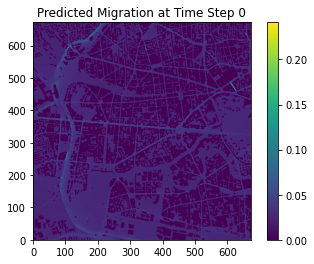

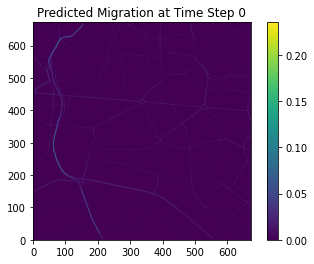

In [88]:
plt.imshow(migrations[3,:500,:500], cmap='viridis', extent=[0, 672, 0, 672])
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()

plt.imshow(emissions[3], cmap='viridis', extent=[0, 672, 0, 672])
plt.title('Predicted Migration at Time Step 0')
plt.colorbar()
plt.show()

In [68]:
y_test.shape

(3, 451584)

In [70]:
predictions_res.shape

(3, 672, 672)